# <div style="text-align: center; background-color:pink; font-family:Georgia, serif; color: black; padding: 20px;line-height: 1;border-radius:5px; border: 2px solid black;">House Price Prediction</div>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/house-prices-advanced-regression-techniques/sample_submission.csv
/kaggle/input/house-prices-advanced-regression-techniques/data_description.txt
/kaggle/input/house-prices-advanced-regression-techniques/train.csv
/kaggle/input/house-prices-advanced-regression-techniques/test.csv


# Import Libraries

In [2]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import xgboost as xgb
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

# Data Importing

In [3]:
train_data=pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/train.csv')
test_data=pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/test.csv')

In [4]:
train_data

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [5]:
test_data

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
1455,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml
1457,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal


# Data Preprocessing

In [6]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [7]:
train_data.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [8]:
# Checking null value
train_data.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

# Handling null values 

## Train Data

In [9]:
column_with_null=train_data.columns[train_data.isnull().any()]

In [10]:
column_with_null

Index(['LotFrontage', 'Alley', 'MasVnrType', 'MasVnrArea', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Electrical', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence',
       'MiscFeature'],
      dtype='object')

In [11]:
train_data[column_with_null]

,LotFrontage,Alley,MasVnrType,MasVnrArea,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Electrical,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageQual,GarageCond,PoolQC,Fence,MiscFeature
0,65.0,NaN,BrkFace,196.0,Gd,TA,No,GLQ,Unf,SBrkr,NaN,Attchd,2003.0,RFn,TA,TA,NaN,NaN,NaN
1,80.0,NaN,NaN,0.0,Gd,TA,Gd,ALQ,Unf,SBrkr,TA,Attchd,1976.0,RFn,TA,TA,NaN,NaN,NaN
2,68.0,NaN,BrkFace,162.0,Gd,TA,Mn,GLQ,Unf,SBrkr,TA,Attchd,2001.0,RFn,TA,TA,NaN,NaN,NaN
3,60.0,NaN,NaN,0.0,TA,Gd,No,ALQ,Unf,SBrkr,Gd,Detchd,1998.0,Unf,TA,TA,NaN,NaN,NaN
4,84.0,NaN,BrkFace,350.0,Gd,TA,Av,GLQ,Unf,SBrkr,TA,Attchd,2000.0,RFn,TA,TA,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,62.0,NaN,NaN,0.0,Gd,TA,No,Unf,Unf,SBrkr,TA,Attchd,1999.0,RFn,TA,TA,NaN,NaN,NaN
1456,85.0,NaN,Stone,119.0,Gd,TA,No,ALQ,Rec,SBrkr,TA,Attchd,1978.0,Unf,TA,TA,NaN,MnPrv,NaN
1457,66.0,NaN,NaN,0.0,TA,Gd,No,GLQ,Unf,SBrkr,Gd,Attchd,1941.0,RFn,TA,TA,NaN,GdPrv,Shed
1458,68.0,NaN,NaN,0.0,TA,TA,Mn,GLQ,Rec,FuseA,NaN,Attchd,1950.0,Unf,TA,TA,NaN,NaN,NaN


In [12]:
# Differentiate between numerical and categorical columns
numerical_columns = train_data.select_dtypes(include=['number']).columns
categorical_columns = train_data.select_dtypes(exclude=['number']).columns


In [13]:
numerical_columns

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

In [14]:
categorical_columns

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')

In [15]:
# Identify columns with null values that are numerical or categorical
numerical_columns_with_null = [col for col in column_with_null if col in numerical_columns]
categorical_columns_with_null = [col for col in column_with_null if col in categorical_columns]


In [16]:
train_data[numerical_columns_with_null]

,LotFrontage,MasVnrArea,GarageYrBlt
0,65.0,196.0,2003.0
1,80.0,0.0,1976.0
2,68.0,162.0,2001.0
3,60.0,0.0,1998.0
4,84.0,350.0,2000.0
...,...,...,...
1455,62.0,0.0,1999.0
1456,85.0,119.0,1978.0
1457,66.0,0.0,1941.0
1458,68.0,0.0,1950.0


In [17]:
train_data[categorical_columns_with_null]

,Alley,MasVnrType,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Electrical,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PoolQC,Fence,MiscFeature
0,NaN,BrkFace,Gd,TA,No,GLQ,Unf,SBrkr,NaN,Attchd,RFn,TA,TA,NaN,NaN,NaN
1,NaN,NaN,Gd,TA,Gd,ALQ,Unf,SBrkr,TA,Attchd,RFn,TA,TA,NaN,NaN,NaN
2,NaN,BrkFace,Gd,TA,Mn,GLQ,Unf,SBrkr,TA,Attchd,RFn,TA,TA,NaN,NaN,NaN
3,NaN,NaN,TA,Gd,No,ALQ,Unf,SBrkr,Gd,Detchd,Unf,TA,TA,NaN,NaN,NaN
4,NaN,BrkFace,Gd,TA,Av,GLQ,Unf,SBrkr,TA,Attchd,RFn,TA,TA,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,NaN,NaN,Gd,TA,No,Unf,Unf,SBrkr,TA,Attchd,RFn,TA,TA,NaN,NaN,NaN
1456,NaN,Stone,Gd,TA,No,ALQ,Rec,SBrkr,TA,Attchd,Unf,TA,TA,NaN,MnPrv,NaN
1457,NaN,NaN,TA,Gd,No,GLQ,Unf,SBrkr,Gd,Attchd,RFn,TA,TA,NaN,GdPrv,Shed
1458,NaN,NaN,TA,TA,Mn,GLQ,Rec,FuseA,NaN,Attchd,Unf,TA,TA,NaN,NaN,NaN


In [18]:
# Handling null values in numerical columns
for col in numerical_columns_with_null:
    # Replace null values with median
    train_data[col].fillna(train_data[col].median(), inplace=True)

/tmp/ipykernel_24/51842099.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_data[col].fillna(train_data[col].median(), inplace=True)
/tmp/ipykernel_24/51842099.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)'

In [19]:
# Handling null values in categorical columns
for col in categorical_columns_with_null:
    # Replace null values with most frequent category (mode)
    train_data[col].fillna(train_data[col].mode()[0], inplace=True)


/tmp/ipykernel_24/358670641.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_data[col].fillna(train_data[col].mode()[0], inplace=True)


In [20]:
train_data.isnull().sum()

Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
                ..
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
Length: 81, dtype: int64

# Handling Null values in Test Data

In [21]:
test_data

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
1455,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml
1457,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal


In [22]:
test_data.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           4
LotFrontage      227
LotArea            0
                ... 
MiscVal            0
MoSold             0
YrSold             0
SaleType           1
SaleCondition      0
Length: 80, dtype: int64

In [23]:
columns_with_null=test_data.columns[test_data.isnull().any()]

In [24]:
test_data[columns_with_null]

,MSZoning,LotFrontage,Alley,Utilities,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,BsmtQual,BsmtCond,...,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PoolQC,Fence,MiscFeature,SaleType
0,RH,80.0,NaN,AllPub,VinylSd,VinylSd,NaN,0.0,TA,TA,...,1961.0,Unf,1.0,730.0,TA,TA,NaN,MnPrv,NaN,WD
1,RL,81.0,NaN,AllPub,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,...,1958.0,Unf,1.0,312.0,TA,TA,NaN,NaN,Gar2,WD
2,RL,74.0,NaN,AllPub,VinylSd,VinylSd,NaN,0.0,Gd,TA,...,1997.0,Fin,2.0,482.0,TA,TA,NaN,MnPrv,NaN,WD
3,RL,78.0,NaN,AllPub,VinylSd,VinylSd,BrkFace,20.0,TA,TA,...,1998.0,Fin,2.0,470.0,TA,TA,NaN,NaN,NaN,WD
4,RL,43.0,NaN,AllPub,HdBoard,HdBoard,NaN,0.0,Gd,TA,...,1992.0,RFn,2.0,506.0,TA,TA,NaN,NaN,NaN,WD
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,RM,21.0,NaN,AllPub,CemntBd,CmentBd,NaN,0.0,TA,TA,...,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,WD
1455,RM,21.0,NaN,AllPub,CemntBd,CmentBd,NaN,0.0,TA,TA,...,1970.0,Unf,1.0,286.0,TA,TA,NaN,NaN,NaN,WD
1456,RL,160.0,NaN,AllPub,VinylSd,VinylSd,NaN,0.0,TA,TA,...,1960.0,Unf,2.0,576.0,TA,TA,NaN,NaN,NaN,WD
1457,RL,62.0,NaN,AllPub,HdBoard,Wd Shng,NaN,0.0,Gd,TA,...,NaN,NaN,0.0,0.0,NaN,NaN,NaN,MnPrv,Shed,WD


### Differentiate between numerical and categorical columns

In [25]:
numerical=test_data.select_dtypes(include=['number']).columns
categorical=test_data.select_dtypes(exclude=['number']).columns

In [26]:
numerical

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold'],
      dtype='object')

In [27]:
categorical

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')

In [28]:
numerical_columns_with_null = [col for col in columns_with_null if col in numerical]
categorical_columns_with_null = [col for col in columns_with_null if col in categorical]


In [29]:
numerical_columns_with_null

['LotFrontage',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 'BsmtFullBath',
 'BsmtHalfBath',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea']

In [30]:
categorical_columns_with_null

['MSZoning',
 'Alley',
 'Utilities',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType']

In [31]:
# Handling null values in numerical columns
for col in numerical_columns_with_null:
    # Replace null values with median
    test_data[col].fillna(test_data[col].median(), inplace=True)


/tmp/ipykernel_24/4275010330.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  test_data[col].fillna(test_data[col].median(), inplace=True)
/tmp/ipykernel_24/4275010330.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True

In [32]:

# Handling null values in numerical columns
for col in categorical_columns_with_null:
    # Replace null values with most frequent category (mode)
    test_data[col].fillna(test_data[col].mode()[0], inplace=True)


/tmp/ipykernel_24/3721831769.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  test_data[col].fillna(test_data[col].mode()[0], inplace=True)


In [33]:
test_data.isnull().sum()

Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
                ..
MiscVal          0
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
Length: 80, dtype: int64

Data is cleaned 

In [34]:
# Checking Unique values
for i in train_data.columns:
    print(i,':',train_data[i].nunique())

Id : 1460
MSSubClass : 15
MSZoning : 5
LotFrontage : 110
LotArea : 1073
Street : 2
Alley : 2
LotShape : 4
LandContour : 4
Utilities : 2
LotConfig : 5
LandSlope : 3
Neighborhood : 25
Condition1 : 9
Condition2 : 8
BldgType : 5
HouseStyle : 8
OverallQual : 10
OverallCond : 9
YearBuilt : 112
YearRemodAdd : 61
RoofStyle : 6
RoofMatl : 8
Exterior1st : 15
Exterior2nd : 16
MasVnrType : 3
MasVnrArea : 327
ExterQual : 4
ExterCond : 5
Foundation : 6
BsmtQual : 4
BsmtCond : 4
BsmtExposure : 4
BsmtFinType1 : 6
BsmtFinSF1 : 637
BsmtFinType2 : 6
BsmtFinSF2 : 144
BsmtUnfSF : 780
TotalBsmtSF : 721
Heating : 6
HeatingQC : 5
CentralAir : 2
Electrical : 5
1stFlrSF : 753
2ndFlrSF : 417
LowQualFinSF : 24
GrLivArea : 861
BsmtFullBath : 4
BsmtHalfBath : 3
FullBath : 4
HalfBath : 3
BedroomAbvGr : 8
KitchenAbvGr : 4
KitchenQual : 4
TotRmsAbvGrd : 12
Functional : 7
Fireplaces : 4
FireplaceQu : 5
GarageType : 6
GarageYrBlt : 97
GarageFinish : 3
GarageCars : 5
GarageArea : 441
GarageQual : 5
GarageCond : 5
PavedDr

In [35]:
data=pd.concat((train_data,test_data)).reset_index(drop=True)


# Data Visualization

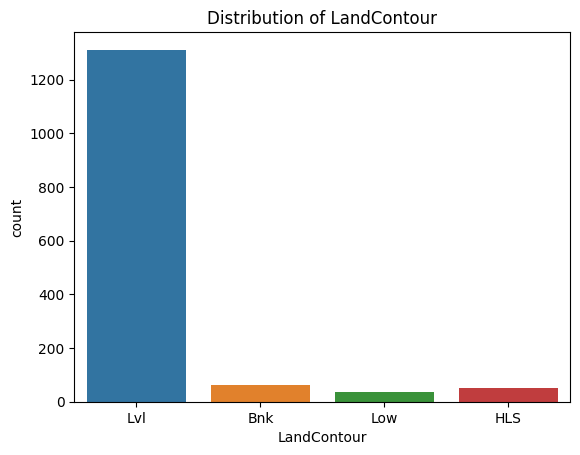

In [36]:
sns.countplot(x='LandContour',data=train_data)
plt.title('Distribution of LandContour')
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


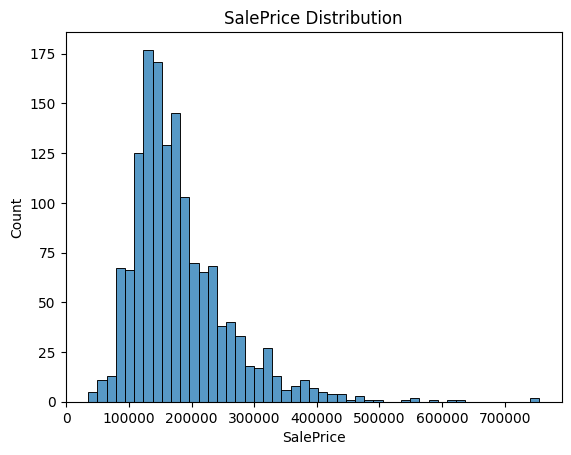

In [37]:
sns.histplot(x='SalePrice',data=train_data)
plt.title('SalePrice Distribution')
plt.show()

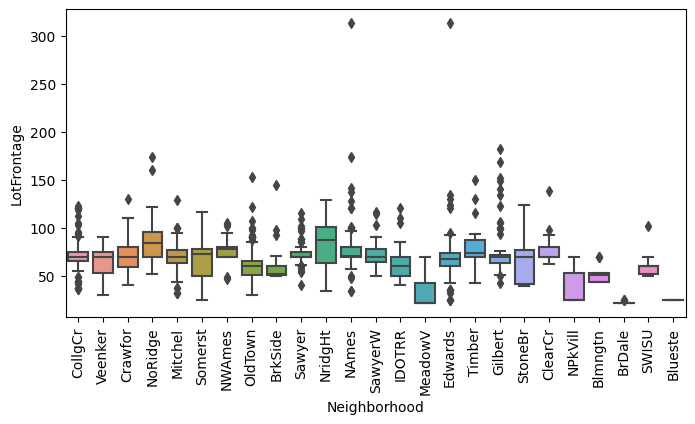

In [38]:
plt.figure(figsize = (8, 4), dpi = 100)
sns.boxplot(x = "Neighborhood", y = "LotFrontage", data = train_data)
plt.xticks(rotation = 90)
plt.show()

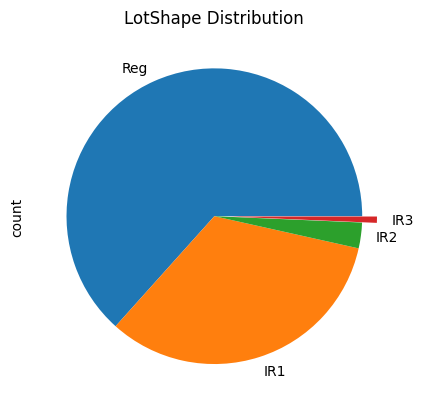

In [39]:
train_data['LotShape'].value_counts().plot(kind='pie',explode=(0,0,0,0.1))
plt.title('LotShape Distribution')
plt.show()

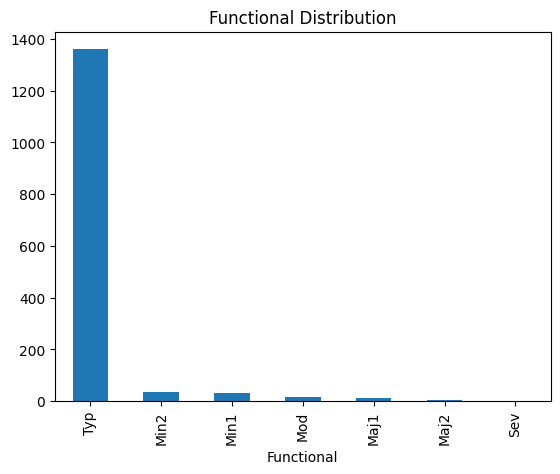

In [40]:
train_data['Functional'].value_counts().plot(kind='bar')
plt.title('Functional Distribution')
plt.show()

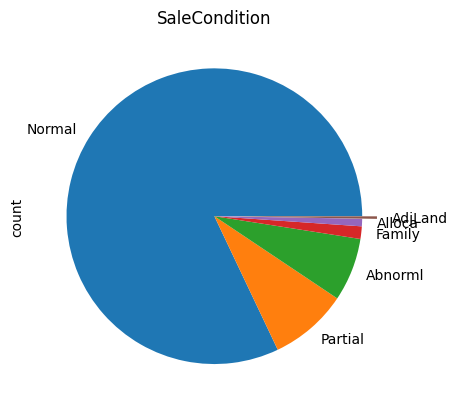

In [41]:
train_data['SaleCondition'].value_counts().plot(kind='pie',explode=(0,0,0,0,0,0.1))
plt.title('SaleCondition')
plt.show()

In [42]:
data.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

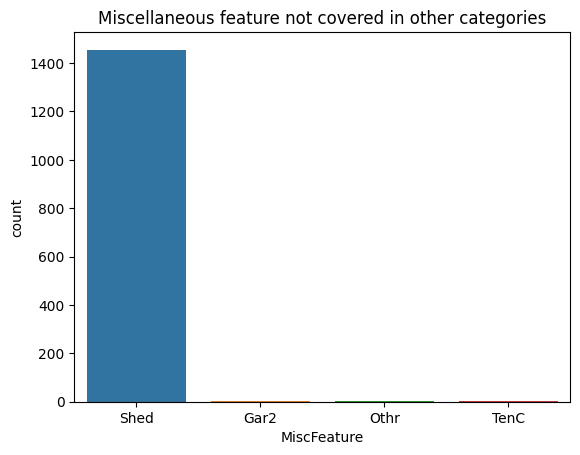

In [43]:
sns.countplot(x='MiscFeature',data=train_data)
plt.title('Miscellaneous feature not covered in other categories')
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


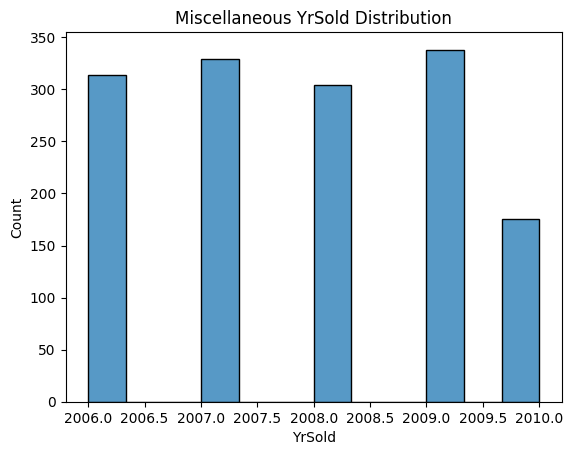

In [44]:
sns.histplot(x='YrSold',data=train_data)
plt.title('Miscellaneous YrSold Distribution')
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


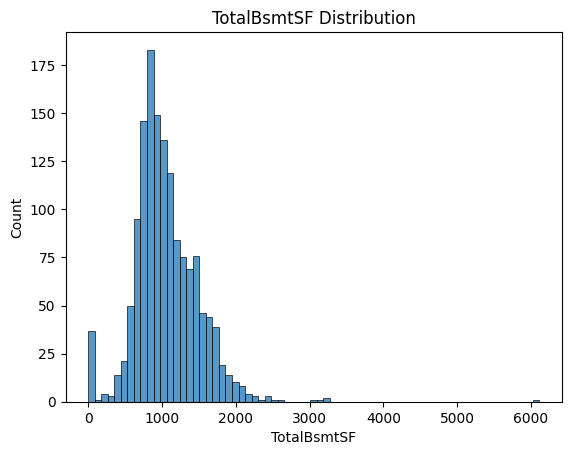

In [45]:
sns.histplot(x='TotalBsmtSF',data=train_data)
plt.title('TotalBsmtSF Distribution')
plt.show()

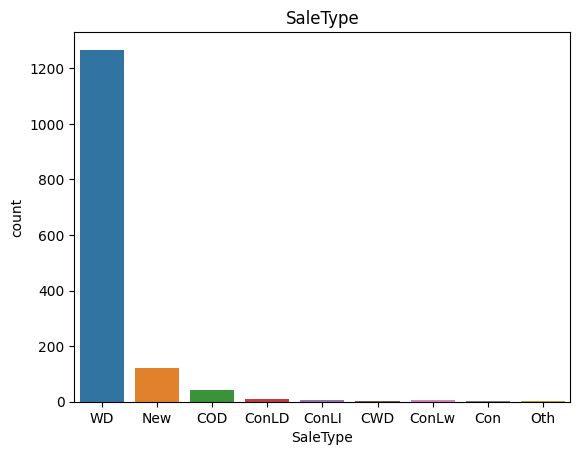

In [46]:
sns.countplot(x='SaleType',data=train_data)
plt.title('SaleType')
plt.show()

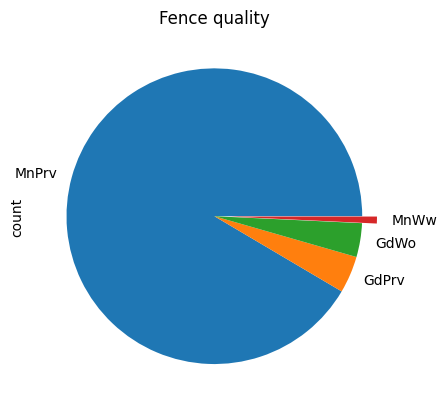

In [47]:
train_data['Fence'].value_counts().plot(kind='pie',explode=(0,0,0,0.1))
plt.title('Fence quality')
plt.show()

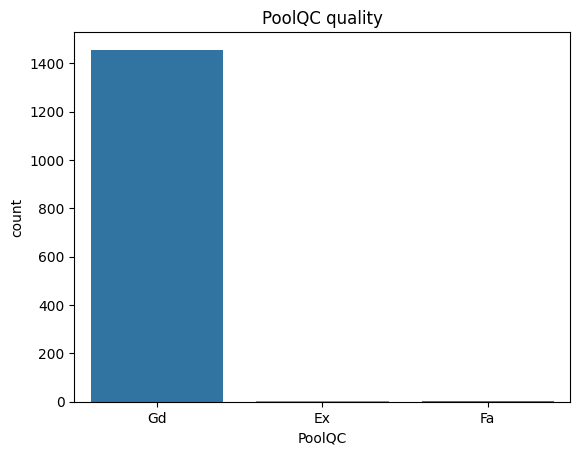

In [48]:
sns.countplot(x='PoolQC',data=train_data)
plt.title('PoolQC quality')
plt.show()

In [49]:
train_data

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Grvl,Reg,Lvl,AllPub,...,0,Gd,MnPrv,Shed,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Grvl,Reg,Lvl,AllPub,...,0,Gd,MnPrv,Shed,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,Grvl,IR1,Lvl,AllPub,...,0,Gd,MnPrv,Shed,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,Grvl,IR1,Lvl,AllPub,...,0,Gd,MnPrv,Shed,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,Grvl,IR1,Lvl,AllPub,...,0,Gd,MnPrv,Shed,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,Grvl,Reg,Lvl,AllPub,...,0,Gd,MnPrv,Shed,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,Grvl,Reg,Lvl,AllPub,...,0,Gd,MnPrv,Shed,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,Grvl,Reg,Lvl,AllPub,...,0,Gd,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,Grvl,Reg,Lvl,AllPub,...,0,Gd,MnPrv,Shed,0,4,2010,WD,Normal,142125


# Feature Engineering

In [50]:
## Age since the last remodel
# train_data['age_remodel'] = train_data['YrSold'] - train_data['YearRemodAdd']
# test_data['age_remodel'] = test_data['YrSold'] - test_data['YearRemodAdd']

## Age of the property  

In [51]:
train_data['AGE_OF_PPT'] = train_data['YrSold'] - train_data['YearBuilt']
test_data['AGE_OF_PPT'] = test_data['YrSold'] - test_data['YearBuilt']

In [52]:
train_data.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [53]:
data=pd.concat((train_data,test_data)).reset_index(drop=True)


In [54]:
data

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,AGE_OF_PPT
0,1,60,RL,65.0,8450,Pave,Grvl,Reg,Lvl,AllPub,...,Gd,MnPrv,Shed,0,2,2008,WD,Normal,208500.0,5
1,2,20,RL,80.0,9600,Pave,Grvl,Reg,Lvl,AllPub,...,Gd,MnPrv,Shed,0,5,2007,WD,Normal,181500.0,31
2,3,60,RL,68.0,11250,Pave,Grvl,IR1,Lvl,AllPub,...,Gd,MnPrv,Shed,0,9,2008,WD,Normal,223500.0,7
3,4,70,RL,60.0,9550,Pave,Grvl,IR1,Lvl,AllPub,...,Gd,MnPrv,Shed,0,2,2006,WD,Abnorml,140000.0,91
4,5,60,RL,84.0,14260,Pave,Grvl,IR1,Lvl,AllPub,...,Gd,MnPrv,Shed,0,12,2008,WD,Normal,250000.0,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2914,2915,160,RM,21.0,1936,Pave,Grvl,Reg,Lvl,AllPub,...,Ex,MnPrv,Shed,0,6,2006,WD,Normal,NaN,36
2915,2916,160,RM,21.0,1894,Pave,Grvl,Reg,Lvl,AllPub,...,Ex,MnPrv,Shed,0,4,2006,WD,Abnorml,NaN,36
2916,2917,20,RL,160.0,20000,Pave,Grvl,Reg,Lvl,AllPub,...,Ex,MnPrv,Shed,0,9,2006,WD,Abnorml,NaN,46
2917,2918,85,RL,62.0,10441,Pave,Grvl,Reg,Lvl,AllPub,...,Ex,MnPrv,Shed,700,7,2006,WD,Normal,NaN,14


# Model Building

In [55]:
data

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,AGE_OF_PPT
0,1,60,RL,65.0,8450,Pave,Grvl,Reg,Lvl,AllPub,...,Gd,MnPrv,Shed,0,2,2008,WD,Normal,208500.0,5
1,2,20,RL,80.0,9600,Pave,Grvl,Reg,Lvl,AllPub,...,Gd,MnPrv,Shed,0,5,2007,WD,Normal,181500.0,31
2,3,60,RL,68.0,11250,Pave,Grvl,IR1,Lvl,AllPub,...,Gd,MnPrv,Shed,0,9,2008,WD,Normal,223500.0,7
3,4,70,RL,60.0,9550,Pave,Grvl,IR1,Lvl,AllPub,...,Gd,MnPrv,Shed,0,2,2006,WD,Abnorml,140000.0,91
4,5,60,RL,84.0,14260,Pave,Grvl,IR1,Lvl,AllPub,...,Gd,MnPrv,Shed,0,12,2008,WD,Normal,250000.0,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2914,2915,160,RM,21.0,1936,Pave,Grvl,Reg,Lvl,AllPub,...,Ex,MnPrv,Shed,0,6,2006,WD,Normal,NaN,36
2915,2916,160,RM,21.0,1894,Pave,Grvl,Reg,Lvl,AllPub,...,Ex,MnPrv,Shed,0,4,2006,WD,Abnorml,NaN,36
2916,2917,20,RL,160.0,20000,Pave,Grvl,Reg,Lvl,AllPub,...,Ex,MnPrv,Shed,0,9,2006,WD,Abnorml,NaN,46
2917,2918,85,RL,62.0,10441,Pave,Grvl,Reg,Lvl,AllPub,...,Ex,MnPrv,Shed,700,7,2006,WD,Normal,NaN,14


In [56]:
train_data

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,AGE_OF_PPT
0,1,60,RL,65.0,8450,Pave,Grvl,Reg,Lvl,AllPub,...,Gd,MnPrv,Shed,0,2,2008,WD,Normal,208500,5
1,2,20,RL,80.0,9600,Pave,Grvl,Reg,Lvl,AllPub,...,Gd,MnPrv,Shed,0,5,2007,WD,Normal,181500,31
2,3,60,RL,68.0,11250,Pave,Grvl,IR1,Lvl,AllPub,...,Gd,MnPrv,Shed,0,9,2008,WD,Normal,223500,7
3,4,70,RL,60.0,9550,Pave,Grvl,IR1,Lvl,AllPub,...,Gd,MnPrv,Shed,0,2,2006,WD,Abnorml,140000,91
4,5,60,RL,84.0,14260,Pave,Grvl,IR1,Lvl,AllPub,...,Gd,MnPrv,Shed,0,12,2008,WD,Normal,250000,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,Grvl,Reg,Lvl,AllPub,...,Gd,MnPrv,Shed,0,8,2007,WD,Normal,175000,8
1456,1457,20,RL,85.0,13175,Pave,Grvl,Reg,Lvl,AllPub,...,Gd,MnPrv,Shed,0,2,2010,WD,Normal,210000,32
1457,1458,70,RL,66.0,9042,Pave,Grvl,Reg,Lvl,AllPub,...,Gd,GdPrv,Shed,2500,5,2010,WD,Normal,266500,69
1458,1459,20,RL,68.0,9717,Pave,Grvl,Reg,Lvl,AllPub,...,Gd,MnPrv,Shed,0,4,2010,WD,Normal,142125,60


In [57]:
test_data

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,AGE_OF_PPT
0,1461,20,RH,80.0,11622,Pave,Grvl,Reg,Lvl,AllPub,...,0,Ex,MnPrv,Shed,0,6,2010,WD,Normal,49
1,1462,20,RL,81.0,14267,Pave,Grvl,IR1,Lvl,AllPub,...,0,Ex,MnPrv,Gar2,12500,6,2010,WD,Normal,52
2,1463,60,RL,74.0,13830,Pave,Grvl,IR1,Lvl,AllPub,...,0,Ex,MnPrv,Shed,0,3,2010,WD,Normal,13
3,1464,60,RL,78.0,9978,Pave,Grvl,IR1,Lvl,AllPub,...,0,Ex,MnPrv,Shed,0,6,2010,WD,Normal,12
4,1465,120,RL,43.0,5005,Pave,Grvl,IR1,HLS,AllPub,...,0,Ex,MnPrv,Shed,0,1,2010,WD,Normal,18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21.0,1936,Pave,Grvl,Reg,Lvl,AllPub,...,0,Ex,MnPrv,Shed,0,6,2006,WD,Normal,36
1455,2916,160,RM,21.0,1894,Pave,Grvl,Reg,Lvl,AllPub,...,0,Ex,MnPrv,Shed,0,4,2006,WD,Abnorml,36
1456,2917,20,RL,160.0,20000,Pave,Grvl,Reg,Lvl,AllPub,...,0,Ex,MnPrv,Shed,0,9,2006,WD,Abnorml,46
1457,2918,85,RL,62.0,10441,Pave,Grvl,Reg,Lvl,AllPub,...,0,Ex,MnPrv,Shed,700,7,2006,WD,Normal,14


In [58]:
ntrain=train_data.shape[0]

In [59]:
ntrain

1460

In [60]:
y=train_data['SalePrice']

In [61]:
categorical=data.dtypes[train_data.dtypes=='object']
categorical

MSZoning         object
Street           object
Alley            object
LotShape         object
LandContour      object
Utilities        object
LotConfig        object
LandSlope        object
Neighborhood     object
Condition1       object
Condition2       object
BldgType         object
HouseStyle       object
RoofStyle        object
RoofMatl         object
Exterior1st      object
Exterior2nd      object
MasVnrType       object
ExterQual        object
ExterCond        object
Foundation       object
BsmtQual         object
BsmtCond         object
BsmtExposure     object
BsmtFinType1     object
BsmtFinType2     object
Heating          object
HeatingQC        object
CentralAir       object
Electrical       object
KitchenQual      object
Functional       object
FireplaceQu      object
GarageType       object
GarageFinish     object
GarageQual       object
GarageCond       object
PavedDrive       object
PoolQC           object
Fence            object
MiscFeature      object
SaleType        

In [62]:
categorical=data[categorical.index]

In [63]:
categorical

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,Gd,MnPrv,Shed,WD,Normal
1,RL,Pave,Grvl,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,...,Attchd,RFn,TA,TA,Y,Gd,MnPrv,Shed,WD,Normal
2,RL,Pave,Grvl,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,Gd,MnPrv,Shed,WD,Normal
3,RL,Pave,Grvl,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,...,Detchd,Unf,TA,TA,Y,Gd,MnPrv,Shed,WD,Abnorml
4,RL,Pave,Grvl,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,...,Attchd,RFn,TA,TA,Y,Gd,MnPrv,Shed,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2914,RM,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,...,Attchd,Unf,TA,TA,Y,Ex,MnPrv,Shed,WD,Normal
2915,RM,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,...,CarPort,Unf,TA,TA,Y,Ex,MnPrv,Shed,WD,Abnorml
2916,RL,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,...,Detchd,Unf,TA,TA,Y,Ex,MnPrv,Shed,WD,Abnorml
2917,RL,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,...,Attchd,Unf,TA,TA,Y,Ex,MnPrv,Shed,WD,Normal


# LabelEncoder

In [64]:
cols = ('FireplaceQu', 'BsmtQual', 'BsmtCond', 'GarageQual', 'GarageCond', 
        'ExterQual', 'ExterCond','HeatingQC', 'PoolQC', 'KitchenQual', 'BsmtFinType1', 
        'BsmtFinType2', 'Functional', 'Fence', 'BsmtExposure', 'GarageFinish', 'LandSlope',
        'LotShape', 'PavedDrive', 'Street', 'Alley', 'CentralAir')



In [65]:
# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Encode categorical columns
for col in cols:
    if col in data.columns:
        data[col] = label_encoder.fit_transform(data[col].astype(str))


In [66]:
remain_categorical=data.dtypes[data.dtypes=='object']

In [67]:
remain_categorical

MSZoning         object
LandContour      object
Utilities        object
LotConfig        object
Neighborhood     object
Condition1       object
Condition2       object
BldgType         object
HouseStyle       object
RoofStyle        object
RoofMatl         object
Exterior1st      object
Exterior2nd      object
MasVnrType       object
Foundation       object
Heating          object
Electrical       object
GarageType       object
MiscFeature      object
SaleType         object
SaleCondition    object
dtype: object

In [68]:
data.shape

(2919, 82)

# One Hot Encoding

In [69]:
new_data=pd.get_dummies(data)

In [70]:
new_data

,Id,MSSubClass,LotFrontage,LotArea,Street,Alley,LotShape,LandSlope,OverallQual,OverallCond,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1,60,65.0,8450,1,0,3,0,7,5,...,False,False,False,True,False,False,False,False,True,False
1,2,20,80.0,9600,1,0,3,0,6,8,...,False,False,False,True,False,False,False,False,True,False
2,3,60,68.0,11250,1,0,0,0,7,5,...,False,False,False,True,False,False,False,False,True,False
3,4,70,60.0,9550,1,0,0,0,7,5,...,False,False,False,True,True,False,False,False,False,False
4,5,60,84.0,14260,1,0,0,0,8,5,...,False,False,False,True,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2914,2915,160,21.0,1936,1,0,3,0,4,7,...,False,False,False,True,False,False,False,False,True,False
2915,2916,160,21.0,1894,1,0,3,0,4,5,...,False,False,False,True,True,False,False,False,False,False
2916,2917,20,160.0,20000,1,0,3,0,5,7,...,False,False,False,True,True,False,False,False,False,False
2917,2918,85,62.0,10441,1,0,3,0,5,5,...,False,False,False,True,False,False,False,False,True,False


In [71]:
new_data.shape

(2919, 222)

In [72]:
train = new_data.iloc[:ntrain]


In [73]:
test = new_data.iloc[ntrain:]

In [74]:
test

,Id,MSSubClass,LotFrontage,LotArea,Street,Alley,LotShape,LandSlope,OverallQual,OverallCond,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
1460,1461,20,80.0,11622,1,0,3,0,5,6,...,False,False,False,True,False,False,False,False,True,False
1461,1462,20,81.0,14267,1,0,0,0,6,6,...,False,False,False,True,False,False,False,False,True,False
1462,1463,60,74.0,13830,1,0,0,0,5,5,...,False,False,False,True,False,False,False,False,True,False
1463,1464,60,78.0,9978,1,0,0,0,6,6,...,False,False,False,True,False,False,False,False,True,False
1464,1465,120,43.0,5005,1,0,0,0,8,5,...,False,False,False,True,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2914,2915,160,21.0,1936,1,0,3,0,4,7,...,False,False,False,True,False,False,False,False,True,False
2915,2916,160,21.0,1894,1,0,3,0,4,5,...,False,False,False,True,True,False,False,False,False,False
2916,2917,20,160.0,20000,1,0,3,0,5,7,...,False,False,False,True,True,False,False,False,False,False
2917,2918,85,62.0,10441,1,0,3,0,5,5,...,False,False,False,True,False,False,False,False,True,False


In [75]:
train.shape

(1460, 222)

In [76]:
train=train.drop('SalePrice',axis=1)

In [77]:
test=test.drop('SalePrice',axis=1)

In [78]:
test

,Id,MSSubClass,LotFrontage,LotArea,Street,Alley,LotShape,LandSlope,OverallQual,OverallCond,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
1460,1461,20,80.0,11622,1,0,3,0,5,6,...,False,False,False,True,False,False,False,False,True,False
1461,1462,20,81.0,14267,1,0,0,0,6,6,...,False,False,False,True,False,False,False,False,True,False
1462,1463,60,74.0,13830,1,0,0,0,5,5,...,False,False,False,True,False,False,False,False,True,False
1463,1464,60,78.0,9978,1,0,0,0,6,6,...,False,False,False,True,False,False,False,False,True,False
1464,1465,120,43.0,5005,1,0,0,0,8,5,...,False,False,False,True,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2914,2915,160,21.0,1936,1,0,3,0,4,7,...,False,False,False,True,False,False,False,False,True,False
2915,2916,160,21.0,1894,1,0,3,0,4,5,...,False,False,False,True,True,False,False,False,False,False
2916,2917,20,160.0,20000,1,0,3,0,5,7,...,False,False,False,True,True,False,False,False,False,False
2917,2918,85,62.0,10441,1,0,3,0,5,5,...,False,False,False,True,False,False,False,False,True,False


In [79]:
test.shape

(1459, 221)

In [80]:
X=train
Y=y

In [81]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)


In [82]:
# from sklearn.preprocessing import StandardScaler

# # Create a StandardScaler object
# scaler = StandardScaler()

# # Fit the scaler to the training data and transform the training data
# X_train = scaler.fit_transform(X_train)

# # Transform the test data using the scaler fitted on the training data
# X_test = scaler.transform(X_test)


# RandomForestRegressor

In [83]:
# Create and train the Random Forest regressor
# rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)
rf_regressor = RandomForestRegressor(n_estimators=100, max_depth=10, min_samples_split=5, min_samples_leaf=2, random_state=42)
rf_regressor.fit(X_train, y_train)


RandomForestRegressor(max_depth=10, min_samples_leaf=2, min_samples_split=5,
                      random_state=42)

In [84]:
# Make predictions
y_pred = rf_regressor.predict(X_test)

In [85]:
# Evaluate the model
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
mse = np.sqrt(mean_squared_error(y_test, y_pred))
print("Mean Squared Error (Random Forest Regressor):", mse)
r2_RF = r2_score(y_test, y_pred)
print(f'R-squared: {r2_RF:.4f}')

Mean Squared Error (Random Forest Regressor): 29202.13834347416
R-squared: 0.8888


In [86]:
from sklearn.model_selection import cross_val_score

# Assuming rf_regressor is your trained Random Forest Regressor model

# Perform cross-validation
cv_scores = cross_val_score(rf_regressor, X_train, y_train, cv=5, scoring='neg_mean_squared_error')

# Convert scores to positive MSE values
cv_scores = -cv_scores

# Print the cross-validation scores
print("Cross-Validation Mean Squared Error (Random Forest Regressor):")
print(cv_scores)

# Calculate the mean and standard deviation of the cross-validation scores
cv_mean_mse = cv_scores.mean()
cv_std_mse = cv_scores.std()

print("Mean Cross-Validation MSE:", cv_mean_mse)
print("Standard Deviation of Cross-Validation MSE:", cv_std_mse)

Cross-Validation Mean Squared Error (Random Forest Regressor):
[8.70075059e+08 1.29685541e+09 1.39691913e+09 6.70084861e+08
 6.54897163e+08]
Mean Cross-Validation MSE: 977766323.7331762
Standard Deviation of Cross-Validation MSE: 312415333.32461643


In [87]:
test

,Id,MSSubClass,LotFrontage,LotArea,Street,Alley,LotShape,LandSlope,OverallQual,OverallCond,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
1460,1461,20,80.0,11622,1,0,3,0,5,6,...,False,False,False,True,False,False,False,False,True,False
1461,1462,20,81.0,14267,1,0,0,0,6,6,...,False,False,False,True,False,False,False,False,True,False
1462,1463,60,74.0,13830,1,0,0,0,5,5,...,False,False,False,True,False,False,False,False,True,False
1463,1464,60,78.0,9978,1,0,0,0,6,6,...,False,False,False,True,False,False,False,False,True,False
1464,1465,120,43.0,5005,1,0,0,0,8,5,...,False,False,False,True,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2914,2915,160,21.0,1936,1,0,3,0,4,7,...,False,False,False,True,False,False,False,False,True,False
2915,2916,160,21.0,1894,1,0,3,0,4,5,...,False,False,False,True,True,False,False,False,False,False
2916,2917,20,160.0,20000,1,0,3,0,5,7,...,False,False,False,True,True,False,False,False,False,False
2917,2918,85,62.0,10441,1,0,3,0,5,5,...,False,False,False,True,False,False,False,False,True,False


In [88]:
test_pred = rf_regressor.predict(test)

In [89]:
test_pred

array([126014.7532724 , 152795.47435271, 178867.04759295, ...,
       156085.46394486, 119033.4921525 , 226780.21089694])

# xgboost

In [90]:
import xgboost as xgb
# Initialize XGBoost regressor
xgb_regressor = xgb.XGBRegressor(objective ='reg:squarederror', random_state=42)

In [91]:
# Train the XGBoost regressor
xgb_regressor.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [92]:
# Make predictions
y_pred = xgb_regressor.predict(X_test)


In [93]:
# Calculate Mean Squared Error
mse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f'RMSE: {mse:.4f}')
r2_XG = r2_score(y_test, y_pred)
print(f'R-squared: {r2_XG:.4f}')

RMSE: 26864.4526
R-squared: 0.9059


In [94]:
test_pred = xgb_regressor.predict(test)

In [95]:
test_pred

array([130962.76, 164413.72, 172071.88, ..., 169160.52, 122493.9 ,
       220365.95], dtype=float32)

In [96]:
re= pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/sample_submission.csv')

In [97]:
re

,Id,SalePrice
0,1461,169277.052498
1,1462,187758.393989
2,1463,183583.683570
3,1464,179317.477511
4,1465,150730.079977
...,...,...
1454,2915,167081.220949
1455,2916,164788.778231
1456,2917,219222.423400
1457,2918,184924.279659


In [98]:
importance_scores = xgb_regressor.feature_importances_

# Create a dictionary mapping feature names to their importances
feature_importance_dict = dict(zip(X.columns, importance_scores))

# Sort the dictionary by importance scores in descending order
sorted_feature_importance = sorted(feature_importance_dict.items(), key=lambda x: x[1], reverse=True)


In [99]:
for feature, importance in sorted_feature_importance:
    print(f"{feature}: {importance}")

OverallQual: 0.38386794924736023
LandContour_Bnk: 0.06156069040298462
GarageCars: 0.05762408301234245
GrLivArea: 0.05008035898208618
GarageType_Detchd: 0.039548132568597794
LowQualFinSF: 0.025808043777942657
CentralAir: 0.025595616549253464
GarageFinish: 0.02423745021224022
KitchenAbvGr: 0.019539237022399902
BsmtQual: 0.01850242353975773
MSZoning_RM: 0.01816544495522976
TotalBsmtSF: 0.0166104007512331
Functional: 0.01466579269617796
Exterior2nd_VinylSd: 0.01144323032349348
2ndFlrSF: 0.011001349426805973
KitchenQual: 0.010743885301053524
BsmtFinSF1: 0.01031397469341755
TotRmsAbvGrd: 0.010283627547323704
Fireplaces: 0.009620285592973232
ExterQual: 0.008675687946379185
1stFlrSF: 0.007145674433559179
Heating_GasA: 0.007114740554243326
Neighborhood_OldTown: 0.006861050147563219
Neighborhood_Crawfor: 0.006585989613085985
GarageType_BuiltIn: 0.0063405269756913185
PoolArea: 0.006123674102127552
YearBuilt: 0.00529829878360033
HouseStyle_1.5Fin: 0.005028677172958851
OverallCond: 0.00469327531754

# Submission

In [100]:
sub = pd.DataFrame()
sub['Id'] = test['Id']
sub['SalePrice'] = test_pred
sub.to_csv('submission.csv',index=False)

In [101]:
sub.to_csv('submission.csv', index=False)

# Provide a download link for the user
from IPython.display import FileLink
FileLink('submission.csv')

/kaggle/working/submission.csv